In [1]:
import numpy as np
import pandas as pd

In [2]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     - 25.9 MB 57 kB/s
     |████████████████████████████████| 10.9 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 45.0 MB/s 
     |████████████████████████████████| 102 kB 10.8 MB/s 
     |████████████████████████████████| 675 kB 57.1 MB/s 
     |████████████████████████████████| 4.7 MB 56.9 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 812 kB 54.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=c34776f4e514d94b7ab8dea4f3c4095c9260bd19375591472a35925d9da71784
  Stored in directory: /tmp/pip-ephem-wheel-cache-l3y8b0v3/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=09ec04818be3f8ade24edcb4bbe55aa7e1a64d6b877b5cdd0b5783cfa1a2a7e2
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d

In [3]:
import pandas_profiling as pf

In [15]:
customer_data = pd.read_csv('Mall_Customers.csv' , index_col='CustomerID')

In [16]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [13]:
profile = pf.ProfileReport(customer_data)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
profile.to_file(output_file = 'eda_customer_data.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### choosing the features

In [22]:
X = customer_data.drop(columns=['Age','Gender' ])

In [24]:
X.shape

(200, 2)

### finding the number of clusters using WCSS

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
  model = KMeans(n_clusters = i , init = 'k-means++')
  model.fit(X)

  wcss.append(model.inertia_)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

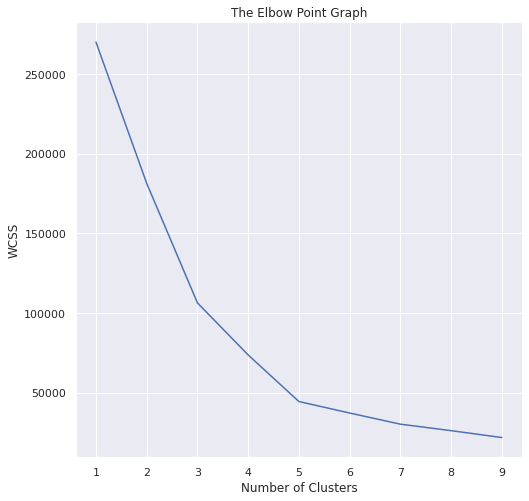

In [38]:
plt.figure(figsize=(8,8))
sns.set()
plt.plot(range(1,10), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

from the above elbow plot it is clear to make 5 clusters!

## now training the model

In [40]:
final_model = KMeans(n_clusters=5 , init='k-means++')
y = final_model.fit_predict(X)

In [49]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [50]:
customer_data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster_number'],
      dtype='object')

In [42]:
customer_data['cluster_number'] = y

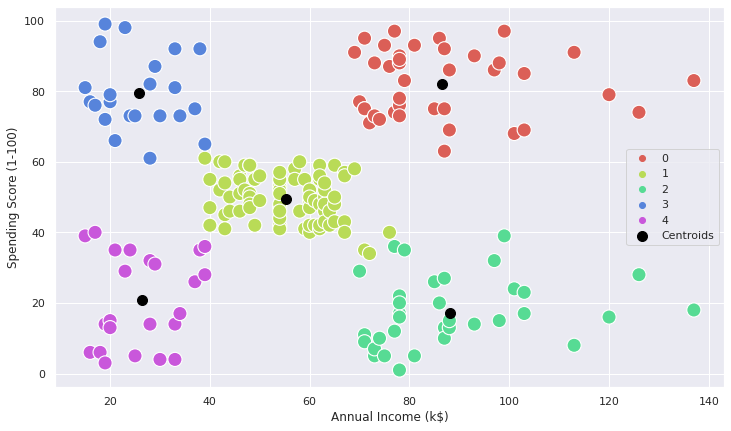

In [63]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster_number',palette=sns.color_palette("hls",5),data=customer_data,legend="full" , s=200)
plt.scatter(final_model.cluster_centers_[:,0], final_model.cluster_centers_[:,1], s=100, c='black', label='Centroids')
plt.legend()

In [58]:
final_model.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])